<a href="https://colab.research.google.com/github/JashKakadiya/WhatsApp-chat-analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

In [2]:
from darts import TimeSeries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salesDataforSingleItem_556.csv')
df['createdDate'] = pd.to_datetime(df['createdDate'], format='%d-%m-%Y')
df = df[['createdDate','total_qty', 'dayofSale' , 'Weekends' , 'promotionIds']]
df = df.groupby("createdDate")['total_qty','dayofSale' , 'Weekends' , 'promotionIds'].mean().reset_index()
df = df.sort_values(by='createdDate')
total_qty_df = df[['createdDate','total_qty']]
total_qty_df.set_index('createdDate' , inplace=True)
weekends_df = df[['createdDate','Weekends']]
weekends_df.set_index('createdDate' , inplace=True)
promotional_df = df[['createdDate','promotionIds']]
promotional_df.set_index('createdDate' , inplace=True)

<ipython-input-4-831726c80f74>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby("createdDate")['total_qty','dayofSale' , 'Weekends' , 'promotionIds'].mean().reset_index()
<ipython-input-4-831726c80f74>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("createdDate")['total_qty','dayofSale' , 'Weekends' , 'promotionIds'].mean().reset_index()


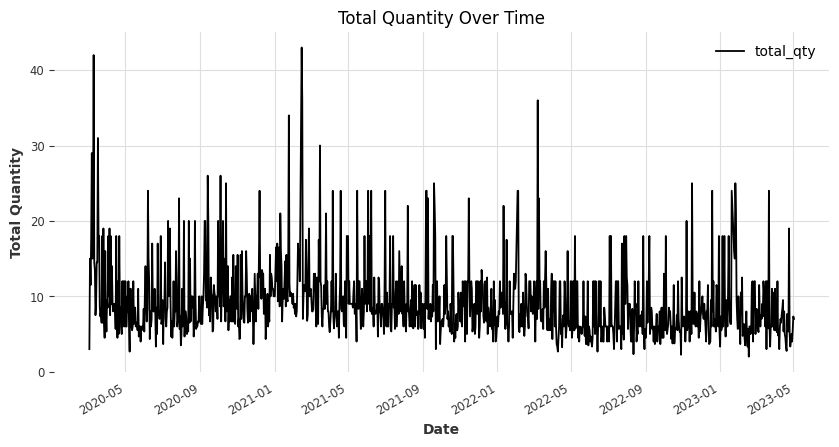

In [5]:
total_qty_df.plot(kind='line', y='total_qty', figsize=(10, 5), grid=True)

# set the chart title and axis labels
plt.title('Total Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')

plt.show()

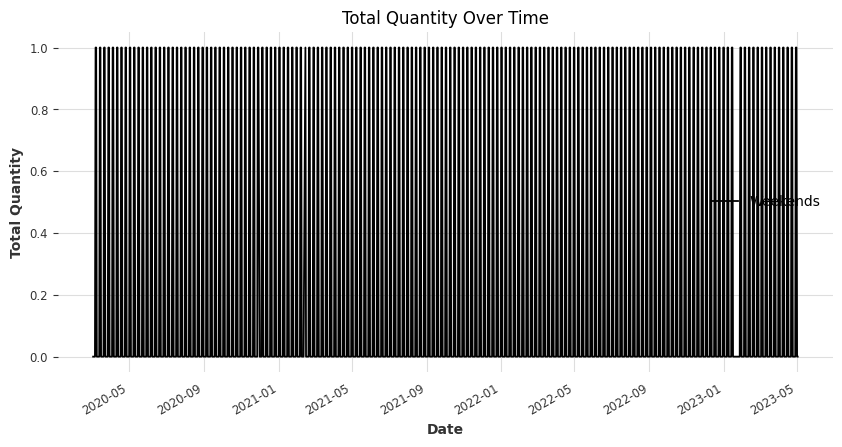

In [6]:
weekends_df.plot(kind='line', y='Weekends', figsize=(10, 5), grid=True)

# set the chart title and axis labels
plt.title('Total Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')

plt.show()

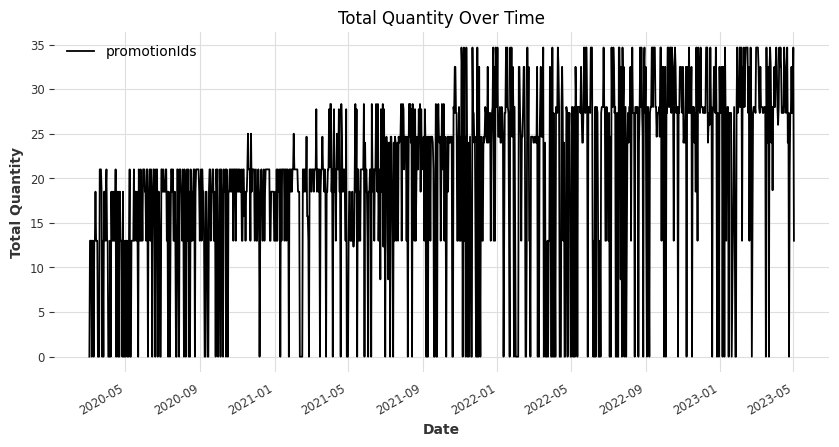

In [7]:
promotional_df.plot(kind='line', y='promotionIds', figsize=(10, 5), grid=True)

# set the chart title and axis labels
plt.title('Total Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')

plt.show()

In [37]:
total_qty_df = df[['createdDate','total_qty']]
total_qty_df = total_qty_df.set_index('createdDate')
total_qty_df_dart = TimeSeries.from_dataframe(total_qty_df,freq='D')

In [38]:
weekends_df = df[['createdDate','total_qty']]
weekends_df = weekends_df.set_index('createdDate')
weekends_df_dart = TimeSeries.from_dataframe(weekends_df,freq='D')

In [39]:
promotional_df = df[['createdDate','total_qty']]
promotional_df = promotional_df.set_index('createdDate')
promotional_df_dart = TimeSeries.from_dataframe(promotional_df,freq='D')

In [45]:
total_qty_df_dart.pd_dataframe().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2020-03-03 to 2023-05-02
Freq: D
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   total_qty  1148 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


In [32]:
weekends_df_dart.pd_dataframe().isnull().sum()

component
total_qty    283
dtype: int64

In [33]:
promotional_df_dart.pd_dataframe().isnull().sum()

component
total_qty    283
dtype: int64

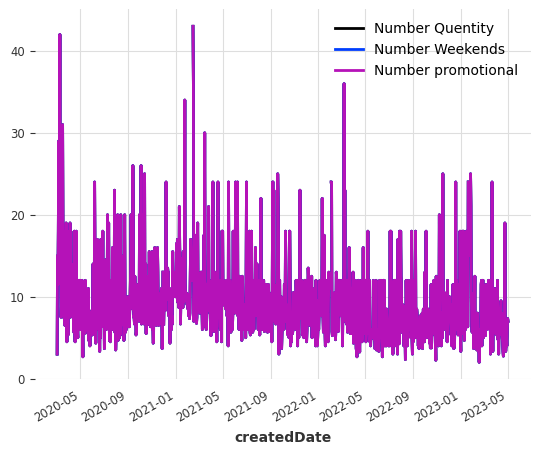

In [28]:
total_qty_df_dart.plot(label='Number Quentity')
weekends_df_dart.plot(label='Number Weekends')
promotional_df_dart.plot(label='Number promotional')
plt.legend();

In [43]:
from darts.dataprocessing.transformers import Scaler
sc_total_qty_df_dart,sc_weekends_df_dart,sc_promotional_df_dart = Scaler(),Scaler(),Scaler()
total_qty_df_dart_scaled = sc_total_qty_df_dart.fit_transform(total_qty_df_dart)
weekends_df_dart_scaled = sc_weekends_df_dart.fit_transform(weekends_df_dart)
promotional_df_dart_scaled = sc_promotional_df_dart.fit_transform(promotional_df_dart)

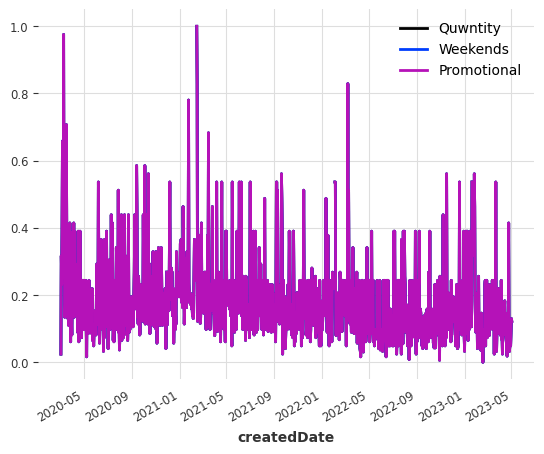

In [44]:
total_qty_df_dart_scaled.plot(label='Quwntity')
weekends_df_dart_scaled.plot(label='Weekends')
promotional_df_dart_scaled.plot(label='Promotional')
plt.legend();

In [46]:
from sklearn.model_selection import train_test_split
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape
train_qty, val_qty = total_qty_df_dart_scaled[:-240], total_qty_df_dart_scaled[-240:]
train_weekend, val_weekend = weekends_df_dart_scaled[:-240], weekends_df_dart_scaled[-240:]
train_promotional, val_promotional = promotional_df_dart_scaled[:-240], promotional_df_dart_scaled[-240:]
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)
model.fit([train_qty, train_weekend,train_promotional], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MAPE = nan%


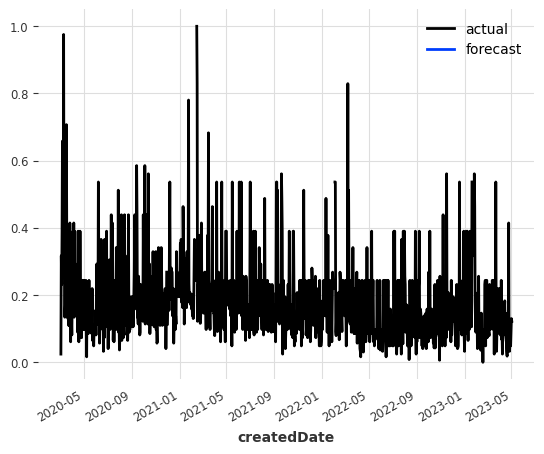

In [48]:
pred = model.predict(n=46, series=train_qty)

total_qty_df_dart_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(total_qty_df_dart_scaled, pred)))

In [49]:
pred

<TimeSeries (DataArray) (createdDate: 46, component: 1, sample: 1)>
array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

...

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]])
Coordinates:
  * createdDate  (createdDate) datetime64[ns] 2022-09-05 ... 2022-10-20
  * component    (component) object 'total_qty'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None